# Hypothesis Testing with Insurance Data

## For each question, make sure to:

* State your Null Hypothesis and Alternative Hypothesis


* Select the correct test according to the data type and number of samples


* Test the assumptions of your selected test.


* Execute the selected test, or the alternative test (if you do not meet the assumptions)


* Interpret your p-value and reject or fail to reject your null hypothesis 


* Show a supporting visualization that helps display the result

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv(r"C:\Users\nbeac\OneDrive\Documents\GitHub\Hypothesis-Testing-with-Insurance-Data\Data\insurance - insurance.csv")
pd.set_option('display.max_columns', None)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 1. Do smokers have higher insurance charges than non-smokers?

In [3]:
smokers = df.loc[ df['smoker']=='yes',"charges"]
non_smokers = df.loc[ df['smoker']=='no',"charges"]
## Getting means for gender height
print(f"For Non_Smokers (n={len(non_smokers)}): Mean={np.mean(non_smokers):.2f}")
print(f"For Smokers (n={len(smokers)}): Mean={np.mean(smokers):.2f}")

For Non_Smokers (n=1064): Mean=8434.27
For Smokers (n=274): Mean=32050.23


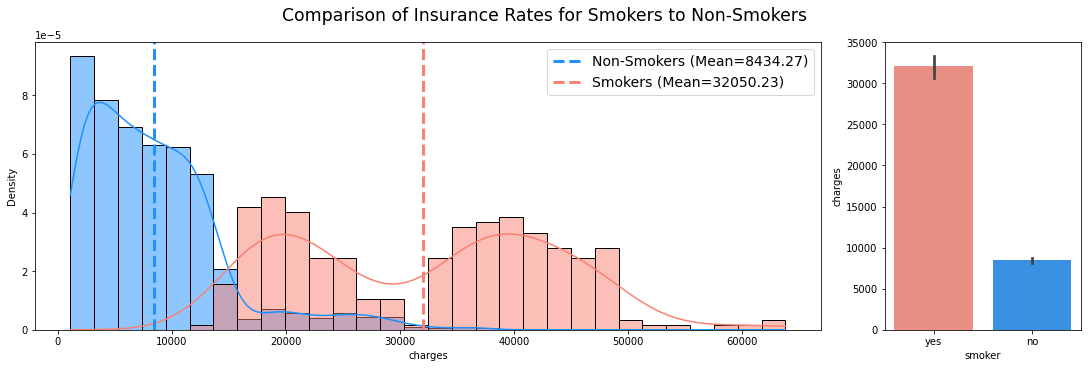

In [4]:
gender_palette={'no':'dodgerblue', "yes":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (15,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=gender_palette)

ax.axvline(np.mean(non_smokers), ls='--',lw=3, 
           label=f"Non-Smokers (Mean={np.mean(non_smokers):.2f})",color=gender_palette['no'])

ax.axvline(np.mean(smokers), ls='--', lw=3, 
           label=f"Smokers (Mean={np.mean(smokers):.2f})",color=gender_palette['yes'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=gender_palette)
fig.suptitle('Comparison of Insurance Rates for Smokers to Non-Smokers',fontsize='xx-large');

#### Hypothesis

As you can see, there is a significant difference between the means of those that smoke and those that do not. 

I will use the t-test to determine if this difference is statistically significant of if it is just due to randomness in the samples. 

* Null-Hypothesis: Smokers have a higher charge for insurance than those that do not smoke.

* Alternative Hypothesis: Smokers are not charged a higher insurance than those that do not smoke. 

#### Testing for Outliers

#### Smokers Outliers

In [5]:
zscores_f = stats.zscore(smokers)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

In [6]:
result_smokers = stats.normaltest(smokers)
result_smokers

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

#### Non-Smokers Outliers

In [7]:
zscores_m = stats.zscore(non_smokers)
outliers_m = abs(zscores_m)>3
np.sum(outliers_m)

24

In [8]:
# Need to figure out how to make this into a loop
# Removing outliers from non_smokers
non_smokers = non_smokers[(np.abs(stats.zscore(non_smokers)) < 3)]
zscores= stats.zscore(non_smokers)
outliers = abs(zscores)>3
np.sum(outliers)

19

In [9]:
result_non_smokers = stats.normaltest(non_smokers)
result_non_smokers

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

### 2. Are men more likely to smoke than women?

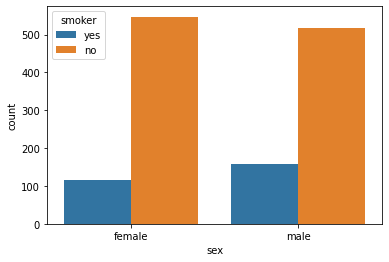

In [38]:
sns.countplot(data=df, x='sex', hue='smoker');

In [40]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [42]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

We can see from the graph and the Chi-Squared test ran that our Null-Hypothesis (Men are more likely to smoke than women) is accurate.

#### Hypothesis

The above chart shows that females are more likely to smoke instead of men.

I'm going to preform a few tests just to ensure the information above is correct. 

### 3. Do different regions have different charges, on average?

In [14]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [15]:
southeast = df.loc[ df['region']=='southeast',"charges"]
southwest = df.loc[ df['region']=='southwest',"charges"]
northwest = df.loc[ df['region']=='northwest',"charges"]
northeast = df.loc[ df['region']=='northeast',"charges"]
## Getting means for gender height
print(f"Southeast (n={len(southeast)}): Mean={np.mean(southeast):.2f}")
print(f"Soutwest  (n={len(southwest)}): Mean={np.mean(southwest):.2f}")
print(f"northwest  (n={len(northwest)}): Mean={np.mean(northwest):.2f}")
print(f"northeast  (n={len(northeast)}): Mean={np.mean(northeast):.2f}")

Southeast (n=364): Mean=14735.41
Soutwest  (n=325): Mean=12346.94
northwest  (n=325): Mean=12417.58
northeast  (n=324): Mean=13406.38


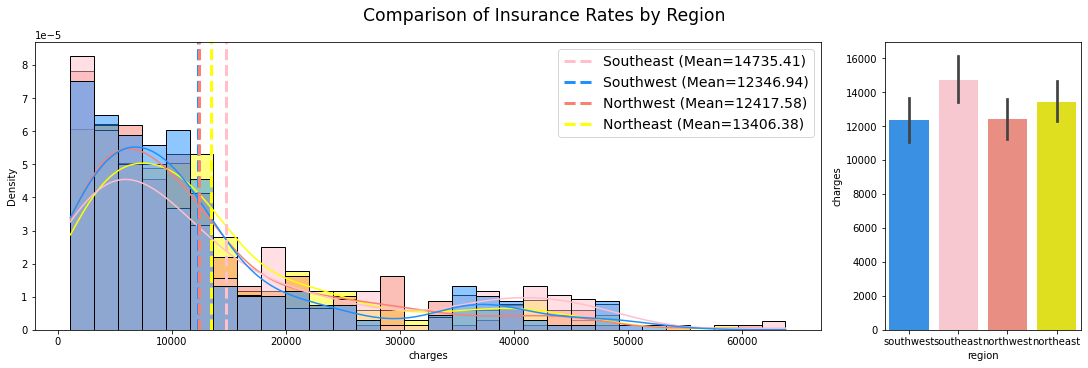

In [16]:
gender_palette={'southeast':'pink','southwest':'dodgerblue', "northwest":'salmon', 'northeast':'yellow'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (15,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='region',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=gender_palette)

ax.axvline(np.mean(southeast), ls='--',lw=3, 
           label=f"Southeast (Mean={np.mean(southeast):.2f})",color=gender_palette['southeast'])

ax.axvline(np.mean(southwest), ls='--',lw=3, 
           label=f"Southwest (Mean={np.mean(southwest):.2f})",color=gender_palette['southwest'])

ax.axvline(np.mean(northwest), ls='--',lw=3, 
           label=f"Northwest (Mean={np.mean(northwest):.2f})",color=gender_palette['northwest'])

ax.axvline(np.mean(northeast), ls='--', lw=3, 
           label=f"Northeast (Mean={np.mean(northeast):.2f})",color=gender_palette['northeast'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='region', y='charges',ax = ax_bar,palette=gender_palette)
fig.suptitle('Comparison of Insurance Rates by Region',fontsize='xx-large');

### Hypothesis

From the above graph it looks as though the only two regions that share similar average rates is going to be the Southwest and Northwest.Southeast has a much higher average than other regions. 

I'm going to run a few more tests to ensure this information is accurate. 

## Analysis

In [44]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [46]:
### checking sig with pandas 
norm_results_df['region'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,region
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [47]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [48]:
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
values = df['charges']
labels = df['region']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


Our Null-Hypothesis is accurate with saying that regions have different charges, even with it just being the Southwest.  